# Project: Investigate the TMDb DataSet.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#bibliography">bibliography</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook we are going to analyse the movie database (TMDb).

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

## Questions on the data set.

Below are some questions we have about the data set:
    
1. What are the most popular movies of all time?
2. What are the top ten grossing movies of all time?
4. How many releases per year on average?

Lets see if we can answer them.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

# Add matplotlib magic
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

This part of the report deals with the task of wrangling the data, here we will be loading the data, looking into the structure of the data frames and then detailing any issues we need to deal with later on in the data cleaning process.

Here we load the dataset into pandas:

In [2]:
df = pd.read_csv('tmdb-movies.csv')

Let us take a quick peek into the basics of the dataset by using df.head, this will give us the first 5 lines of the dataset and insight into column names and structure.

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Right, now that we can see the basic layout of the data frame, lets have a look at some chareteristics.

Using df.info we can see some of the basic constructs of the dataset such as columns and data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Fortunately from the above output, most of the important data we are going to query does not have any non-null (NaN) values, therefore we do not have to worry about imputing the mean. Firstly we could not as they are text based values such as directors, homepages, taglines, keywords and production companies. We would only need to clean and fix that issue if we were missing numerical values.

The imdb_id column appears to have missing data, which might be an issue if we need to use the imdb_id column for any analysis.

We can see that the release_date column is in the incorrect format for us being able to use dates and times.

The budget_adj and revenue_adj are in float and not int.

Using df.describe we can get various mathematical statistics such as the mean, std deviation and percentiles.

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Let's take a look using a simplified view of the unique data per columm below.

In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Lets get some index numbers for our columns for some future exploration.

In [7]:
for a, b, in enumerate(df.columns):
    print(a, b,)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


### Data Cleaning

In this section we will work through the above problems and clean some of the data in order for us to explore better later.

Here we look for the total amount of duplicates:

In [8]:
sum(df.duplicated())

1

Since we see only 1 duplicate it is safe to assume we can thus get rid of it. We do this by using the drop_duplicates function

In [9]:
df.drop_duplicates(inplace=True)

Based on the output from df.info(), we need to convert the 'release_date' column into the datetime format

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'])

We also needed to adjust the budget and revenue fields to be more human readable

In [11]:
df['budget_adj'] = df.budget_adj.round(0).astype(int)

In [12]:
df['revenue_adj'] = df.revenue_adj.round(0).astype(int)

<a id='eda'></a>
## Exploratory Data Analysis

Here we are going to have a look at the dataset and glean some insights.

### What are the most popular movies of all time??

Lets plot a bar chart with the movies filtered by popularity and sorted by the top most popular movies

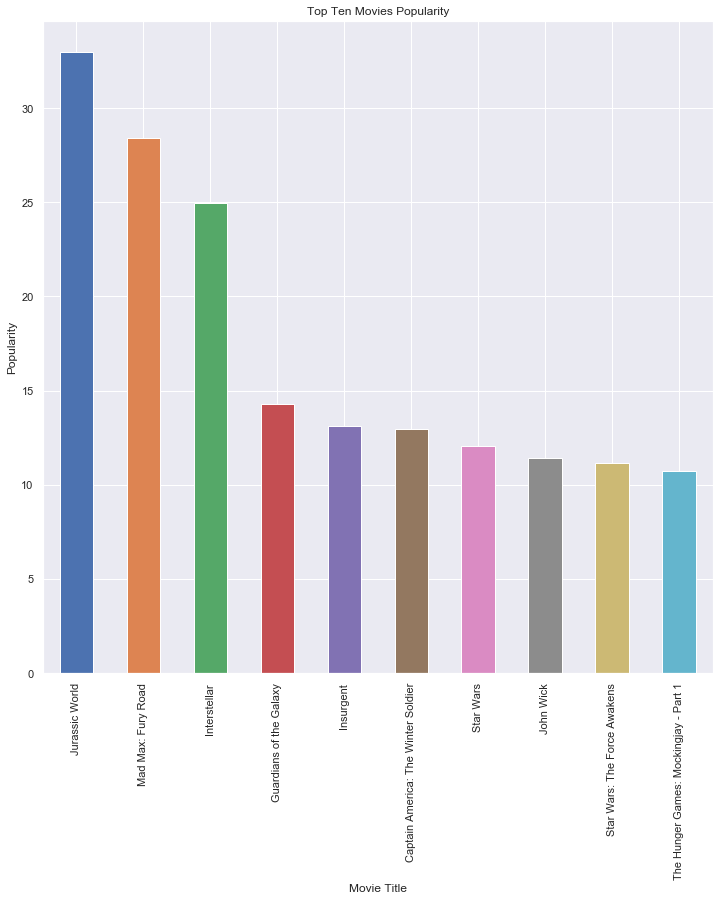

In [13]:
df_pop_topten = df.sort_values('popularity',ascending=False)[:10].plot(figsize=(12, 12), legend=False, x='original_title', y='popularity', kind='bar', title='Top Ten Movies Popularity')
df_pop_topten.set_xlabel("Movie Title")
df_pop_topten.set_ylabel("Popularity");

Lets see if there is any relationship between the vote average and movie popularity.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


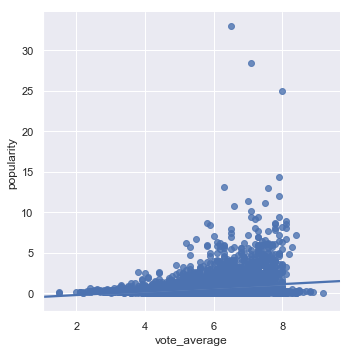

In [14]:
sns.lmplot(x='vote_average', y='popularity', data=df, fit_reg=True);

### What are the top ten grossing movies of all time?

Lets plot another bar chart looking for the top grossing movies of all time, here we sort by revenue and filter on movie name. We are using the revenue_adjusted field to better depict movies that were made many years ago.

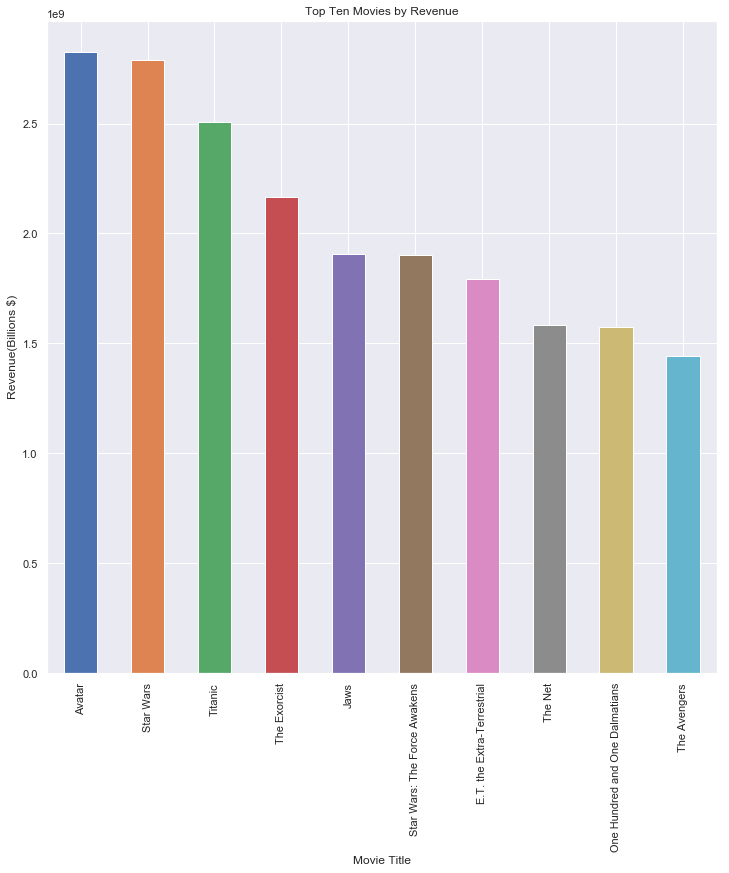

In [15]:
df_rev_topten = df.sort_values('revenue_adj',ascending=False)[:10].plot(figsize=(12, 12), legend=False, x='original_title', y='revenue_adj', kind='bar', title='Top Ten Movies by Revenue')
df_rev_topten.set_xlabel("Movie Title")
df_rev_topten.set_ylabel("Revenue(Billions $)");
#df_rev_topten.head(100)

Do we have any correlation with Popularity and Revenue? (It seems like a dumb question but lets see what the data says).

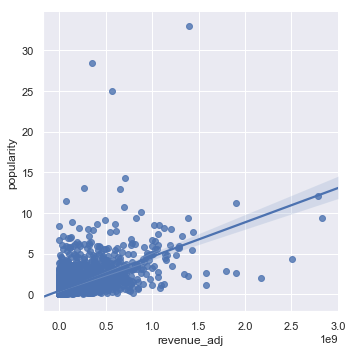

In [16]:
sns.lmplot(x='revenue_adj', y='popularity', data=df, fit_reg=True);

How does budget and revenue correlate?

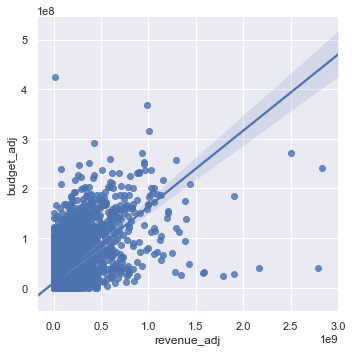

In [17]:
sns.lmplot(x='revenue_adj', y='budget_adj', data=df, fit_reg=True);

### What is the average amount of releases per year for the last 20 years?

In [18]:
df['release_year'].value_counts()[:20].mean()


399.85

Lets have a look and see which years had the most number of releases:

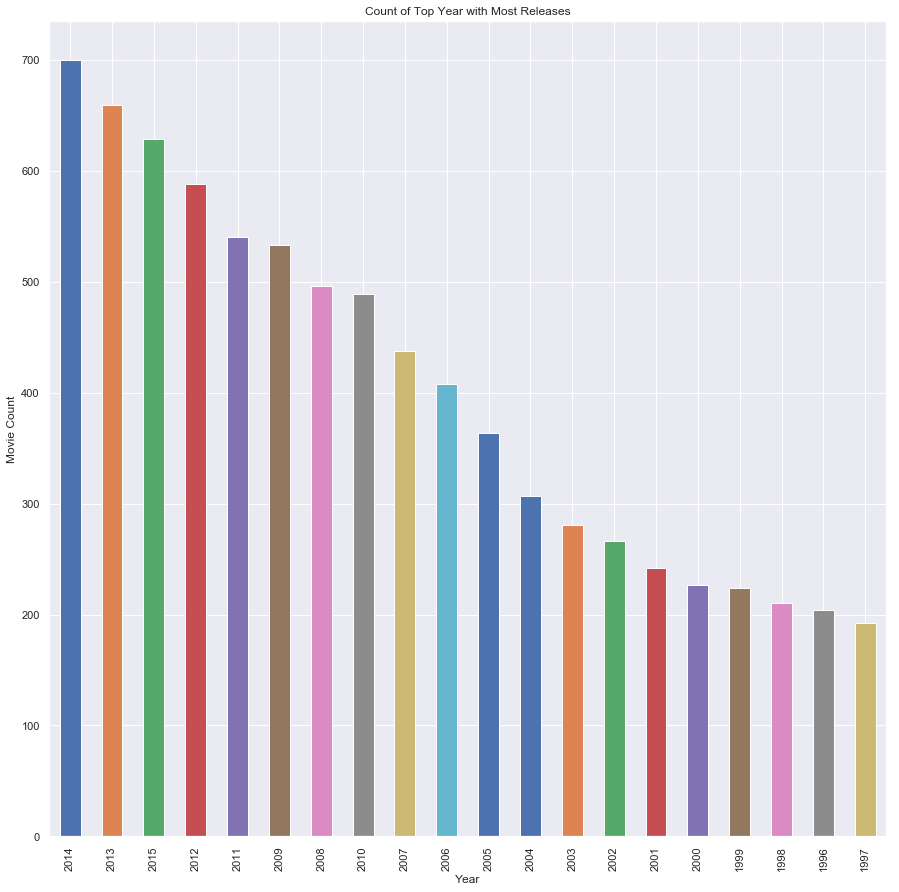

In [19]:
df_rel_topten = df['release_year'].value_counts()[:20].plot(figsize=(15, 15), legend=False, kind='bar', title='Count of Top Year with Most Releases')
df_rel_topten.set_xlabel("Year")
df_rel_topten.set_ylabel("Movie Count");

In [20]:
df['release_year'].value_counts()[:20]

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
Name: release_year, dtype: int64

<a id='conclusions'></a>
## Conclusions

Based on the information gleaned from the dataframes and various plots we can start gaining some insights.

We see some of the older movies retaining the top spots based on Adjusted Revenue.
We also notice that votes and popularity don't have a very strong correlation.

We can see that having a large revenue does not always make the movie very popular, although one would think that a large amount of revenue equals popularity. The data indicates otherwise.

It is interesting to see the velocity at which films are being made as the years progress. In 2014 alone a person would have been able to view almost two (1,91 exactly) movies a day for the whole year without repeats!

<a id="bibliography"></a>
## Bibliography

Below is a list of sources used for help with code and various mechanics of the project.

https://stackoverflow.com/questions/49153253/pandas-rounding-when-converting-float-to-integer

https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

https://elitedatascience.com/python-seaborn-tutorial

https://stackoverflow.com/questions/38792122/how-to-group-and-count-rows-by-month-and-year-using-pandas

https://stackoverflow.com/questions/47487753/when-is-it-appropriate-to-use-df-value-counts-vs-df-groupby-count

https://stackoverflow.com/questions/38338396/sort-and-limit-number-of-bars-to-display-on-bargraph

https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot

https://stackoverflow.com/questions/20865487/pandas-python-plot-without-a-legend